Лабораторная работа 5.1.2 -- Эффект Комптона

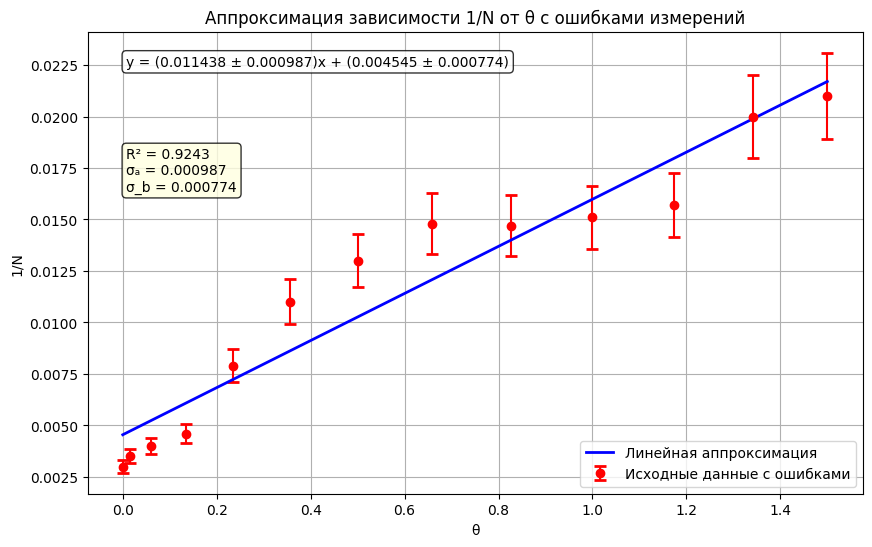

РЕЗУЛЬТАТЫ ЛИНЕЙНОЙ РЕГРЕССИИ
Угловой коэффициент (a): 0.01143809 ± 0.00098665
Свободный член (b): 0.00454484 ± 0.00077392
Ошибка углового коэффициента (σₐ): 0.00098665
Ошибка свободного члена (σ_b): 0.00077392
Коэффициент корреляции (R): 0.961428
Коэффициент детерминации (R²): 0.924344
Стандартная ошибка: 0.000987
p-value: 1.657366e-07
Уравнение регрессии: y = (0.011438 ± 0.000987)x + (0.004545 ± 0.000774)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
tetta = [0, 0.015, 0.06, 0.134, 0.234, 0.357, 0.500, 0.658, 0.826, 1.0, 1.174, 1.342, 1.500]
N = [307, 243, 129, 106, 102, 94, 101, 105, 56, 87, 67, 129, 198]
reverse_N = [0.003, 0.0035, 0.004, 0.0046, 0.0079, 0.011, 0.013, 0.0148, 0.0147, 0.0151, 0.0157, 0.02, 0.021]
x = np.array(tetta)
y = np.array(reverse_N)


y_errors = y * 0.1 
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
coefficients, covariance = np.polyfit(x, y, 1, cov=True)
poly_function = np.poly1d(coefficients)

slope_error = np.sqrt(covariance[0, 0])
intercept_error = np.sqrt(covariance[1, 1])

x_fit = np.linspace(min(x), max(x), 100)
y_fit = poly_function(x_fit)

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=y_errors, fmt='o', color='red', 
             markersize=6, capsize=4, capthick=2, 
             label='Исходные данные с ошибками')

plt.plot(x_fit, y_fit, color='blue', linewidth=2, label='Линейная аппроксимация')
equation_text = f'y = ({coefficients[0]:.6f} ± {slope_error:.6f})x + ({coefficients[1]:.6f} ± {intercept_error:.6f})'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
r_squared = r_value**2
stats_text = f'R² = {r_squared:.4f}\nσₐ = {slope_error:.6f}\nσ_b = {intercept_error:.6f}'
plt.text(0.05, 0.75, stats_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.xlabel('θ')
plt.ylabel('1/N')
plt.title('Аппроксимация зависимости 1/N от θ с ошибками измерений')
plt.legend()
plt.grid(True)
plt.show()
print("="*50)
print("РЕЗУЛЬТАТЫ ЛИНЕЙНОЙ РЕГРЕССИИ")
print("="*50)
print(f"Угловой коэффициент (a): {coefficients[0]:.8f} ± {slope_error:.8f}")
print(f"Свободный член (b): {coefficients[1]:.8f} ± {intercept_error:.8f}")
print(f"Ошибка углового коэффициента (σₐ): {slope_error:.8f}")
print(f"Ошибка свободного члена (σ_b): {intercept_error:.8f}")
print(f"Коэффициент корреляции (R): {r_value:.6f}")
print(f"Коэффициент детерминации (R²): {r_squared:.6f}")
print(f"Стандартная ошибка: {std_err:.6f}")
print(f"p-value: {p_value:.6e}")
print("="*50)
print(f"Уравнение регрессии: y = ({coefficients[0]:.6f} ± {slope_error:.6f})x + ({coefficients[1]:.6f} ± {intercept_error:.6f})")

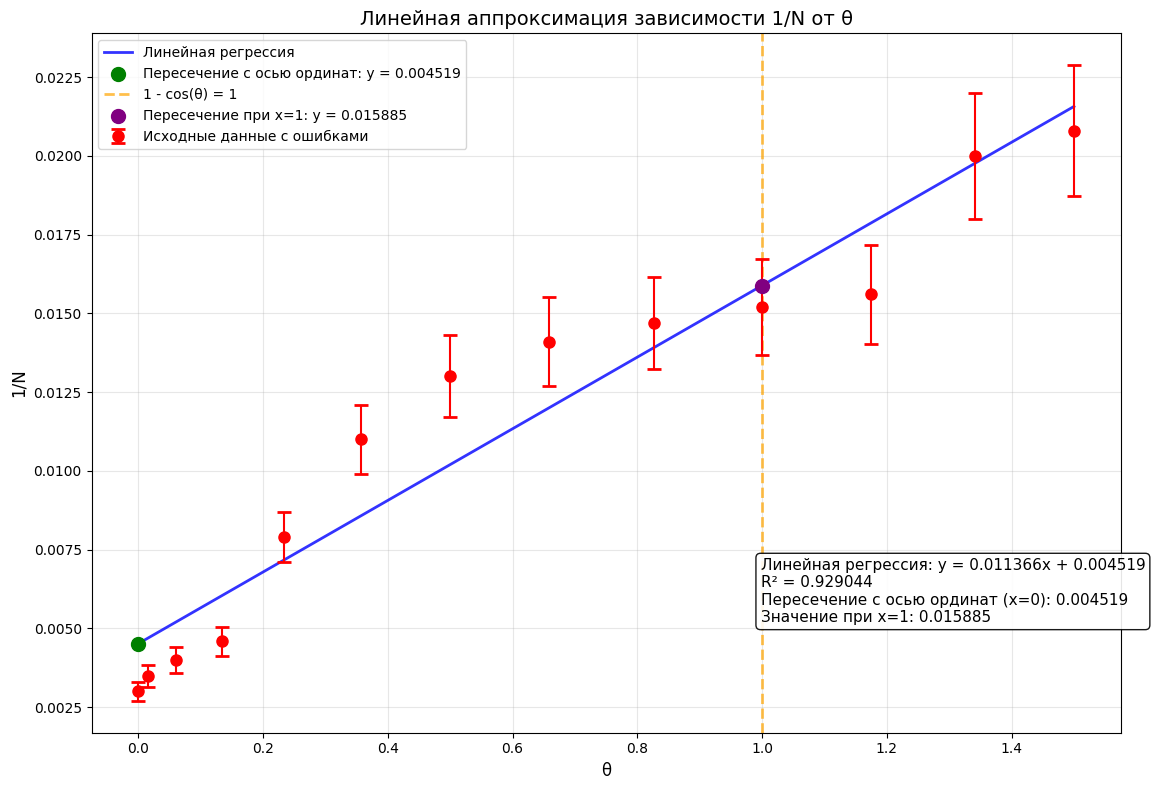

ЛИНЕЙНАЯ АППРОКСИМАЦИЯ
Уравнение: y = 0.011366x + 0.004519
R² = 0.929044
Коэффициент наклона: 0.01136637 ± 0.00094711
Свободный член: 0.00451864 ± 0.00074290
Пересечение с осью ординат (x=0): 0.00451864
Значение при x=1 (1 - cos(θ) = 1): 0.01588501


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

tetta = [0, 0.015, 0.06, 0.134, 0.234, 0.357, 0.500, 0.658, 0.826, 1.0, 1.174, 1.342, 1.500]
N = [333.0, 286.0, 250.0, 217.0, 127.0, 91.0, 77.0, 71.0, 68.0, 66.0, 64.0, 50.0, 48.0]

reverse_N = []
for i in range(len(N)):
    reverse_N.append(round(1 / N[i], 4))

x = np.array(tetta)
y = np.array(reverse_N)
y_errors = y * 0.1

coefficients, covariance = np.polyfit(x, y, 1, cov=True)
poly_function = np.poly1d(coefficients)
errors = np.sqrt(np.diag(covariance))

y_pred = poly_function(x)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

plt.figure(figsize=(12, 8))


plt.errorbar(x, y, yerr=y_errors, fmt='o', color='red', 
             markersize=8, capsize=5, capthick=2, 
             label='Исходные данные с ошибками', zorder=5)

x_fit = np.linspace(min(x), max(x), 500)
y_fit = poly_function(x_fit)
plt.plot(x_fit, y_fit, color='blue', linewidth=2, label='Линейная регрессия', alpha=0.8)

intersection_y_axis = poly_function(0)
plt.scatter(0, intersection_y_axis, color='green', s=100, zorder=10, 
           label=f'Пересечение с осью ординат: y = {intersection_y_axis:.6f}')

plt.axvline(x=1, color='orange', linestyle='--', linewidth=2, 
           label='1 - cos(θ) = 1', alpha=0.7)

intersection_x1 = poly_function(1)
plt.scatter(1, intersection_x1, color='purple', s=100, zorder=10, 
           label=f'Пересечение при x=1: y = {intersection_x1:.6f}')

plt.xlabel('θ', fontsize=12)
plt.ylabel('1/N', fontsize=12)
plt.title('Линейная аппроксимация зависимости 1/N от θ', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
text_str = f"Линейная регрессия: y = {coefficients[0]:.6f}x + {coefficients[1]:.6f}\n"
text_str += f"R² = {r_squared:.6f}\n"
text_str += f"Пересечение с осью ординат (x=0): {intersection_y_axis:.6f}\n"
text_str += f"Значение при x=1: {intersection_x1:.6f}"

plt.text(0.65, 0.25, text_str, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

print("="*60)
print("ЛИНЕЙНАЯ АППРОКСИМАЦИЯ")
print("="*60)
print(f"Уравнение: y = {coefficients[0]:.6f}x + {coefficients[1]:.6f}")
print(f"R² = {r_squared:.6f}")
print(f"Коэффициент наклона: {coefficients[0]:.8f} ± {errors[0]:.8f}")
print(f"Свободный член: {coefficients[1]:.8f} ± {errors[1]:.8f}")
print(f"Пересечение с осью ординат (x=0): {intersection_y_axis:.8f}")
print(f"Значение при x=1 (1 - cos(θ) = 1): {intersection_x1:.8f}")
print("="*60)